In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

In [2]:
# Load the IMDB dataset, keeping only the top 10,000 most common words
vocab_size = 10000
max_length = 200
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# Pad the sequences to ensure all inputs are the same length
x_train = pad_sequences(x_train, maxlen=max_length)
x_test = pad_sequences(x_test, maxlen=max_length)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
# Build the RNN model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=32, input_length=max_length),
    SimpleRNN(32),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.2)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 71ms/step - accuracy: 0.6256 - loss: 0.6324 - val_accuracy: 0.8020 - val_loss: 0.4339
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 69ms/step - accuracy: 0.8537 - loss: 0.3660 - val_accuracy: 0.8416 - val_loss: 0.3679
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 69ms/step - accuracy: 0.9102 - loss: 0.2426 - val_accuracy: 0.8170 - val_loss: 0.4056
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 71ms/step - accuracy: 0.9328 - loss: 0.1875 - val_accuracy: 0.8540 - val_loss: 0.3737
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 19s 62ms/step - accuracy: 0.9650 - loss: 0.1157 - val_accuracy: 0.8472 - val_loss: 0.4350
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 12s 72ms/step - accuracy: 0.9839 - loss: 0.0636 - val_accuracy: 0.8078 - val_loss: 0.5199
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 70ms/step - accuracy: 0.9816 - loss: 0.0641 - val_accuracy: 0.8432 - val_loss: 0.5286
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 68ms/step - accuracy: 0.9900 - loss: 0.0393 - val_accurac

In [4]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_acc}')

782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.8387 - loss: 0.6473
Test Accuracy: 0.835319995880127


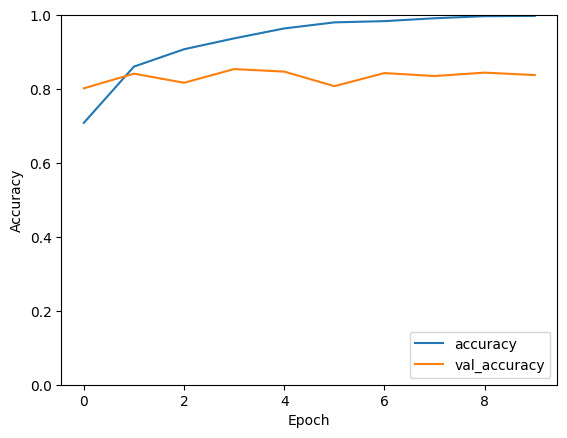

In [5]:
# Plot the accuracy vs epochs
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()